### Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df['Age'].isnull().sum()

177

In [10]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [11]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

#### Lets replace nan values with random-sample values 

In [12]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample 
    # or df[variable+'_random']=df[variable].fillna(random_sample)

In [13]:
median=df.Age.median()
median

28.0

In [42]:
#call the function
impute_nan(df,"Age",median)

In [15]:
df.head(6)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0


#### Let's plot a diagram to ubderstand better

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

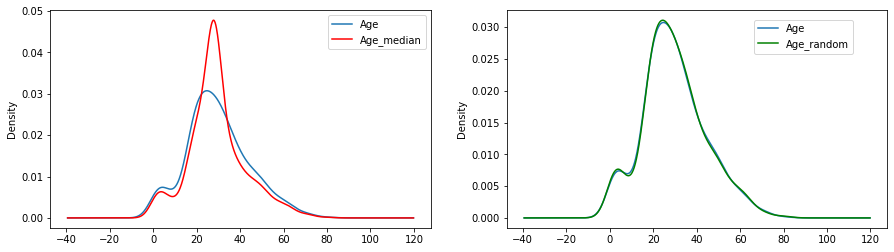

In [41]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

df['Age'].plot(kind='kde', ax=ax1)
df['Age'].plot(kind='kde', ax=ax2)

df.Age_median.plot(kind='kde', ax=ax1, color='red')
df.Age_random.plot(kind='kde', ax=ax2, color='green')

lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines, labels, loc='best')
#ax2.legend(lines2, labels2, loc='best')
ax2.legend(loc=(0.65, 0.8))

#### As we comapre two diagram we can see ramdom-sample method don't distortes the variance much in comparison to orginal data and Median Imputation.

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work